In [68]:
import pandas as pd
import numpy as np

#  Charger le CSV 
df = pd.read_csv("insurance.csv")

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [72]:

# Dimensions et premières lignes
print("Shape (rows, cols):", df.shape)
print(df.columns.tolist())
df.head()


Shape (rows, cols): (1338, 7)
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
#Types de données
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [76]:
#Valeurs manquantes 
df.isna().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [78]:
#Stats descriptives pour les colonnes numériques
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [80]:
# 4.1) Vérifier s'il existe des factures négatives ou nulles
print("Nombre de factures négatives ou nulles :", (df["charges"] <= 0).sum())



Nombre de factures négatives ou nulles : 0


In [82]:
# 4.2) Vérifier s'il y a des âges en dehors de 18–64 ans
print("Nombre d'âges hors de [18–64] :", ((df["age"] < 18) | (df["age"] > 64)).sum())

Nombre d'âges hors de [18–64] : 0


In [85]:
# 4.3) Vérifier s'il y a des BMI trop bas (< 10)
print("Nombre de BMI < 10 :", (df["bmi"] < 10).sum())

Nombre de BMI < 10 : 0


In [87]:
# 4.4) Vérifier s'il y a des BMI trop hauts (> 80)
print("Nombre de BMI > 80 :", (df["bmi"] > 80).sum())

Nombre de BMI > 80 : 0


In [89]:
# 4.5) Vérifier s'il y a des enfants négatifs
print("Nombre de valeurs enfants négatives :", (df["children"] < 0).sum())

Nombre de valeurs enfants négatives : 0


In [91]:
#EXPLORATION DES VARIABLES QUALITATIVES
# Sexe

print(df["sex"].value_counts())
print("Valeurs uniques :", df["sex"].unique())

sex
male      676
female    662
Name: count, dtype: int64
Valeurs uniques : ['female' 'male']


In [93]:
# Statut fumeur

print(df["smoker"].value_counts())
print("Valeurs uniques :", df["smoker"].unique())

smoker
no     1064
yes     274
Name: count, dtype: int64
Valeurs uniques : ['yes' 'no']


In [95]:
# Région
print(df["region"].value_counts())
print("Valeurs uniques :", df["region"].unique())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Valeurs uniques : ['southwest' 'southeast' 'northwest' 'northeast']


In [97]:
## Charges selon le statut fumeur

# 1) Moyenne des charges par statut fumeur
charges_smoker = df.groupby("smoker")["charges"].mean().round(2)

# 2) Nombre de patients par statut fumeur
count_smoker = df["smoker"].value_counts()

# 3) Tableau récapitulatif
smoker_summary = pd.DataFrame({
    "Nombre de patients": count_smoker,
    "Charges moyennes ($)": charges_smoker
})

print(smoker_summary)


        Nombre de patients  Charges moyennes ($)
smoker                                          
no                    1064               8434.27
yes                    274              32050.23


In [210]:
import matplotlib.pyplot as plt


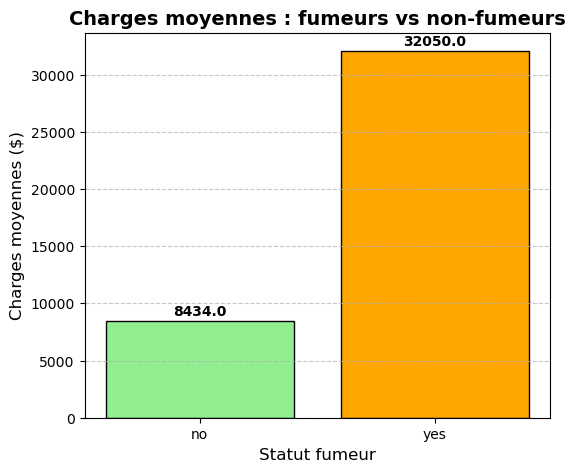

In [212]:
# Barplot pour les charges moyennes par statut fumeur
plt.figure(figsize=(6,5))
plt.bar(smoker_summary.index, smoker_summary["Charges moyennes ($)"], 
        color=["lightgreen","orange"], edgecolor="black")

# Ajouter les titres et labels
plt.title("Charges moyennes : fumeurs vs non-fumeurs", fontsize=14, fontweight="bold")
plt.xlabel("Statut fumeur", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher les valeurs au-dessus des barres
for i, val in enumerate(smoker_summary["Charges moyennes ($)"]):
    plt.text(i, val+500, round(val, 0), ha="center", fontsize=10, fontweight="bold")

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18632\2782922313.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="smoker", y="charges", data=df, palette="Set2")


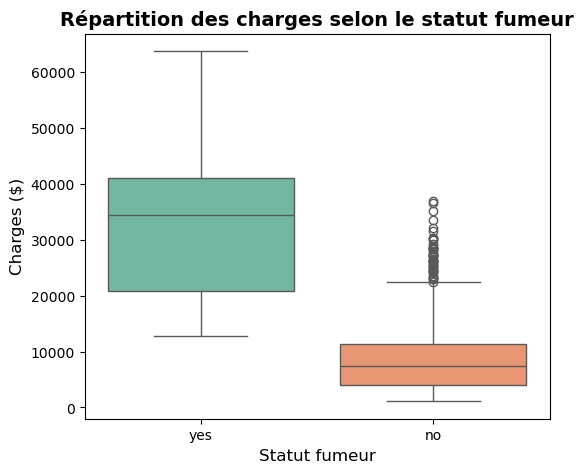

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour visualiser charges selon fumeur ou non
plt.figure(figsize=(6,5))
sns.boxplot(x="smoker", y="charges", data=df, palette="Set2")

plt.title("Répartition des charges selon le statut fumeur", fontsize=14, fontweight="bold")
plt.xlabel("Statut fumeur", fontsize=12)
plt.ylabel("Charges ($)", fontsize=12)

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18632\2765902227.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_smoker_summary = df.groupby(["age_group", "smoker"])["charges"].mean().unstack()


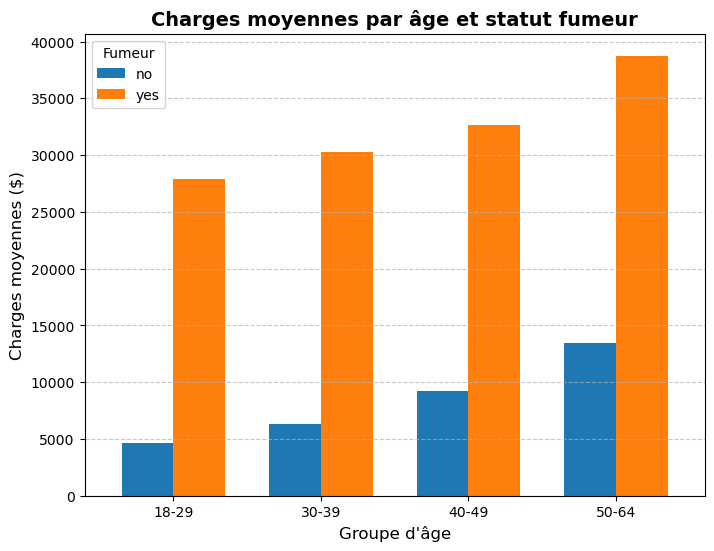

In [107]:
# Charges moyennes par groupe d’âge et statut fumeur
age_bins = [18, 29, 39, 49, 64]
age_labels = ["18-29", "30-39", "40-49", "50-64"]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels, right=True)

age_smoker_summary = df.groupby(["age_group", "smoker"])["charges"].mean().unstack()

# Barres côte à côte
age_smoker_summary.plot(kind="bar", figsize=(8,6), width=0.7)

plt.title("Charges moyennes par âge et statut fumeur", fontsize=14, fontweight="bold")
plt.xlabel("Groupe d'âge", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Fumeur")
plt.show()


In [109]:
# 5.3) Région
print("\n--- REGION ---")
print(df["region"].value_counts())
print("Valeurs uniques :", df["region"].unique())


--- REGION ---
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
Valeurs uniques : ['southwest' 'southeast' 'northwest' 'northeast']


In [111]:
## Créer le tableau region_summary avant le barplot

# Moyenne des charges par région
charges_region = df.groupby("region")["charges"].mean().round(2)

# Nombre de patients par région
count_region = df["region"].value_counts()

# Tableau récapitulatif
region_summary = pd.DataFrame({
    "Nombre de patients": count_region,
    "Charges moyennes ($)": charges_region
})

print(region_summary)



           Nombre de patients  Charges moyennes ($)
region                                             
northeast                 324              13406.38
northwest                 325              12417.58
southeast                 364              14735.41
southwest                 325              12346.94


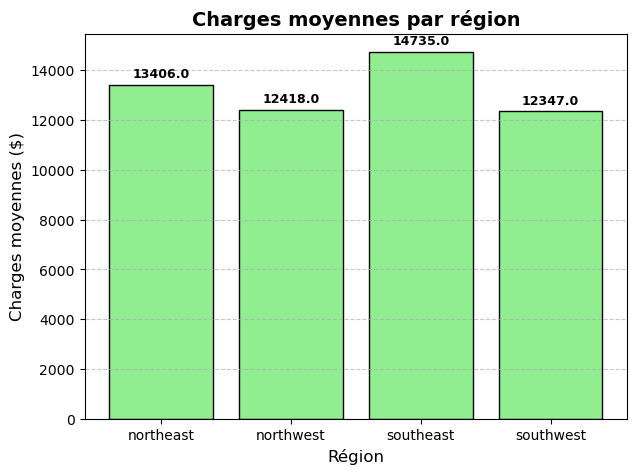

In [113]:
# Barplot pour charges moyennes par région
plt.figure(figsize=(7,5))
plt.bar(region_summary.index, region_summary["Charges moyennes ($)"],
        color="lightgreen", edgecolor="black")

plt.title("Charges moyennes par région", fontsize=14, fontweight="bold")
plt.xlabel("Région", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for i, val in enumerate(region_summary["Charges moyennes ($)"]):
    plt.text(i, val+300, round(val, 0), ha="center", fontsize=9, fontweight="bold")

plt.show()


In [115]:
## PHASE DESCRIPTIVE 
## CHarge moyenne by sex
df.groupby("sex")["charges"].mean().round(2)


sex
female    12569.58
male      13956.75
Name: charges, dtype: float64

In [117]:
##charges moyenne par fumeur ou non 
df.groupby("smoker")["charges"].mean().round(2)


smoker
no      8434.27
yes    32050.23
Name: charges, dtype: float64

In [119]:
##charges moyenne par region
df.groupby("region")["charges"].mean().round(2)


region
northeast    13406.38
northwest    12417.58
southeast    14735.41
southwest    12346.94
Name: charges, dtype: float64

In [121]:
##charges moyenne par enfant 
df.groupby("children")["charges"].mean().round(2)


children
0    12365.98
1    12731.17
2    15073.56
3    15355.32
4    13850.66
5     8786.04
Name: charges, dtype: float64

In [123]:
##charges moyennes par age 
bins = [18, 30, 40, 50, 64]
labels = ["18-29", "30-39", "40-49", "50-64"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)
df.groupby("age_group")["charges"].mean().round(2)


C:\Users\user\AppData\Local\Temp\ipykernel_18632\3667260001.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("age_group")["charges"].mean().round(2)


age_group
18-29     9397.55
30-39    11639.31
40-49    14782.04
50-64    18084.99
Name: charges, dtype: float64

In [125]:
## Charges selon le nombre d'enfants

# 1) Moyenne des charges par nombre d'enfants
charges_children = df.groupby("children")["charges"].mean().round(2)

# 2) Nombre de patients par groupe d'enfants
count_children = df["children"].value_counts().sort_index()

# 3) Tableau récapitulatif
children_summary = pd.DataFrame({
    "Nombre de patients": count_children,
    "Charges moyennes ($)": charges_children
})

print(children_summary)


          Nombre de patients  Charges moyennes ($)
children                                          
0                        574              12365.98
1                        324              12731.17
2                        240              15073.56
3                        157              15355.32
4                         25              13850.66
5                         18               8786.04


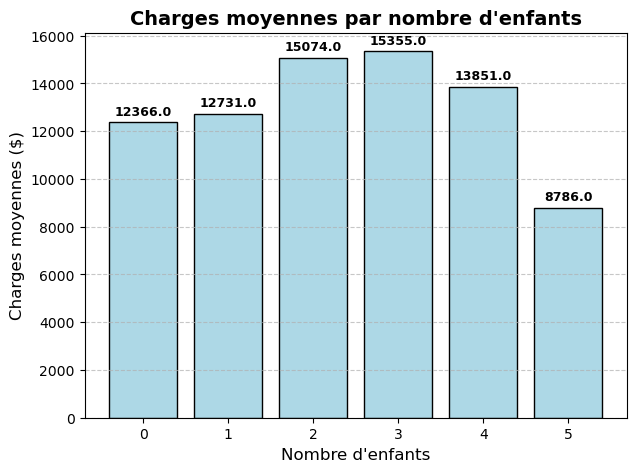

In [127]:
import matplotlib.pyplot as plt

# Barplot pour charges moyennes par nombre d'enfants
plt.figure(figsize=(7,5))
plt.bar(children_summary.index.astype(str), children_summary["Charges moyennes ($)"],
        color="lightblue", edgecolor="black")

plt.title("Charges moyennes par nombre d'enfants", fontsize=14, fontweight="bold")
plt.xlabel("Nombre d'enfants", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ajouter les valeurs au-dessus des barres
for i, val in enumerate(children_summary["Charges moyennes ($)"]):
    plt.text(i, val+300, round(val, 0), ha="center", fontsize=9, fontweight="bold")

plt.show()


In [128]:
 
## Charges selon le BMI avec ordre correct

# Fonction de catégorisation BMI
def bmi_category(bmi):
    if bmi < 18.5:
        return "Maigreur"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Surpoids"
    elif bmi < 35:
        return "Obésité modérée"
    elif bmi < 40:
        return "Obésité sévère"
    else:
        return "Obésité morbide"

# Appliquer la fonction
df["bmi_group"] = df["bmi"].apply(bmi_category)

# Définir l'ordre logique des catégories
categories_order = ["Maigreur", "Normal", "Surpoids", 
                    "Obésité modérée", "Obésité sévère", "Obésité morbide"]

df["bmi_group"] = pd.Categorical(df["bmi_group"], 
                                 categories=categories_order, 
                                 ordered=True)

# Calculer la charge moyenne par groupe BMI
result = df.groupby("bmi_group")["charges"].mean().round(2)
print(result)


bmi_group
Maigreur            8852.20
Normal             10409.34
Surpoids           10987.51
Obésité modérée    14419.67
Obésité sévère     17022.26
Obésité morbide    16784.62
Name: charges, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_18632\3881491996.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby("bmi_group")["charges"].mean().round(2)


In [131]:
df["bmi_group"].value_counts().reindex(categories_order)


bmi_group
Maigreur            20
Normal             225
Surpoids           386
Obésité modérée    391
Obésité sévère     225
Obésité morbide     91
Name: count, dtype: int64

In [133]:
## Charges selon les groupes d'âge

# Définir les tranches d'âge
bins = [18, 29, 39, 49, 64]  
labels = ["18-29", "30-39", "40-49", "50-64"]

# Créer une nouvelle colonne 'age_group'
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)

# 1) Moyenne des charges par groupe d'âge
charges_age = df.groupby("age_group")["charges"].mean().round(2)

# 2) Nombre de patients par groupe d'âge
count_age = df["age_group"].value_counts().reindex(labels)

# 3) Combiner résultats dans un tableau clair
age_summary = pd.DataFrame({
    "Nombre de patients": count_age,
    "Charges moyennes ($)": charges_age
})

print(age_summary)


           Nombre de patients  Charges moyennes ($)
age_group                                          
18-29                     417               9182.49
30-39                     257              11738.78
40-49                     279              14399.20
50-64                     385              17902.55


C:\Users\user\AppData\Local\Temp\ipykernel_18632\628191223.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_age = df.groupby("age_group")["charges"].mean().round(2)


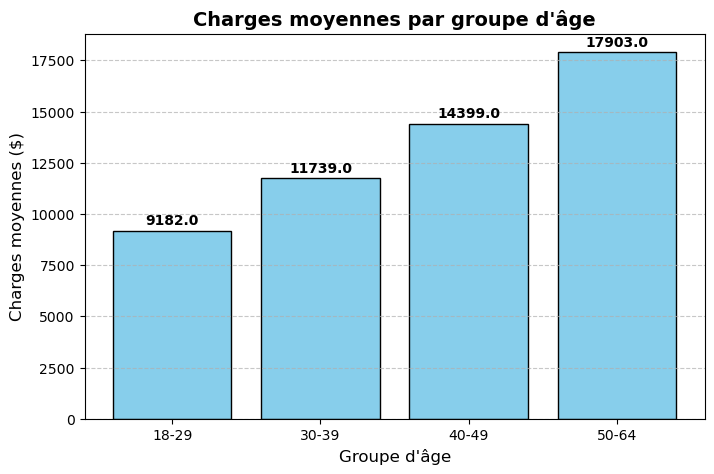

In [135]:
import matplotlib.pyplot as plt

# Reprendre le résumé qu'on a fait avant
age_summary = pd.DataFrame({
    "Nombre de patients": count_age,
    "Charges moyennes ($)": charges_age
})

# Barplot pour les charges moyennes
plt.figure(figsize=(8,5))
plt.bar(age_summary.index, age_summary["Charges moyennes ($)"], color="skyblue", edgecolor="black")

# Ajouter les étiquettes
plt.title("Charges moyennes par groupe d'âge", fontsize=14, fontweight="bold")
plt.xlabel("Groupe d'âge", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher valeurs au-dessus des barres
for i, val in enumerate(age_summary["Charges moyennes ($)"]):
    plt.text(i, val+300, round(val, 0), ha="center", fontsize=10, fontweight="bold")

plt.show()


In [137]:
## Charges selon le sexe

# 1) Moyenne des charges par sexe
charges_sex = df.groupby("sex")["charges"].mean().round(2)

# 2) Nombre de patients par sexe
count_sex = df["sex"].value_counts()

# 3) Tableau récapitulatif
sex_summary = pd.DataFrame({
    "Nombre de patients": count_sex,
    "Charges moyennes ($)": charges_sex
})

print(sex_summary)


        Nombre de patients  Charges moyennes ($)
sex                                             
female                 662              12569.58
male                   676              13956.75


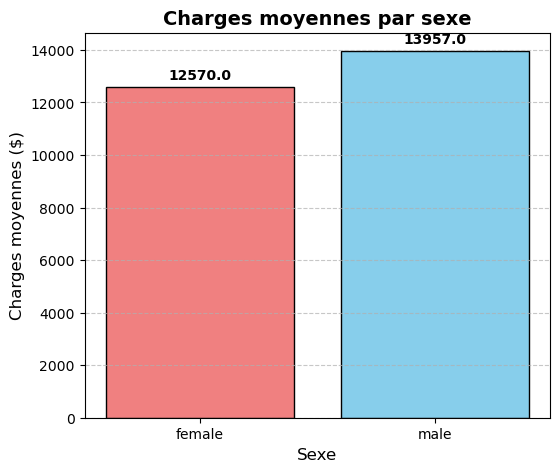

In [139]:
import matplotlib.pyplot as plt

# Reprendre le résumé du sexe
sex_summary = pd.DataFrame({
    "Nombre de patients": count_sex,
    "Charges moyennes ($)": charges_sex
})

# Barplot pour les charges moyennes par sexe
plt.figure(figsize=(6,5))
plt.bar(sex_summary.index, sex_summary["Charges moyennes ($)"], color=["lightcoral","skyblue"], edgecolor="black")

# Ajouter les titres et labels
plt.title("Charges moyennes par sexe", fontsize=14, fontweight="bold")
plt.xlabel("Sexe", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Afficher les valeurs au-dessus des barres
for i, val in enumerate(sex_summary["Charges moyennes ($)"]):
    plt.text(i, val+300, round(val, 0), ha="center", fontsize=10, fontweight="bold")

plt.show()


In [141]:
# Tableau récapitulatif global

# Âge
age_summary = pd.DataFrame({
    "Nombre de patients": df["age_group"].value_counts().reindex(["18-29","30-39","40-49","50-64"]),
    "Charges moyennes ($)": df.groupby("age_group")["charges"].mean().round(2)
})

# Sexe
sex_summary = pd.DataFrame({
    "Nombre de patients": df["sex"].value_counts(),
    "Charges moyennes ($)": df.groupby("sex")["charges"].mean().round(2)
})

# BMI
categories_order = ["Maigreur","Normal","Surpoids","Obésité modérée","Obésité sévère","Obésité morbide"]
bmi_summary = pd.DataFrame({
    "Nombre de patients": df["bmi_group"].value_counts().reindex(categories_order),
    "Charges moyennes ($)": df.groupby("bmi_group")["charges"].mean().round(2).reindex(categories_order)
})

# Smoker
smoker_summary = pd.DataFrame({
    "Nombre de patients": df["smoker"].value_counts(),
    "Charges moyennes ($)": df.groupby("smoker")["charges"].mean().round(2)
})

# Children
children_summary = pd.DataFrame({
    "Nombre de patients": df["children"].value_counts().sort_index(),
    "Charges moyennes ($)": df.groupby("children")["charges"].mean().round(2)
})

# Region
region_summary = pd.DataFrame({
    "Nombre de patients": df["region"].value_counts(),
    "Charges moyennes ($)": df.groupby("region")["charges"].mean().round(2)
})

# Afficher les 6 tableaux
print("=== Âge ===")
display(age_summary)

print("\n=== Sexe ===")
display(sex_summary)

print("\n=== BMI ===")
display(bmi_summary)

print("\n=== Fumeur ===")
display(smoker_summary)

print("\n=== Enfants ===")
display(children_summary)

print("\n=== Région ===")
display(region_summary)


=== Âge ===


C:\Users\user\AppData\Local\Temp\ipykernel_18632\1475093641.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "Charges moyennes ($)": df.groupby("age_group")["charges"].mean().round(2)
C:\Users\user\AppData\Local\Temp\ipykernel_18632\1475093641.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  "Charges moyennes ($)": df.groupby("bmi_group")["charges"].mean().round(2).reindex(categories_order)


,Nombre de patients,Charges moyennes ($)
age_group,,
18-29,417,9182.49
30-39,257,11738.78
40-49,279,14399.20
50-64,385,17902.55



=== Sexe ===


,Nombre de patients,Charges moyennes ($)
sex,,
female,662,12569.58
male,676,13956.75



=== BMI ===


,Nombre de patients,Charges moyennes ($)
bmi_group,,
Maigreur,20,8852.20
Normal,225,10409.34
Surpoids,386,10987.51
Obésité modérée,391,14419.67
Obésité sévère,225,17022.26
Obésité morbide,91,16784.62



=== Fumeur ===


,Nombre de patients,Charges moyennes ($)
smoker,,
no,1064,8434.27
yes,274,32050.23



=== Enfants ===


,Nombre de patients,Charges moyennes ($)
children,,
0,574,12365.98
1,324,12731.17
2,240,15073.56
3,157,15355.32
4,25,13850.66
5,18,8786.04



=== Région ===


,Nombre de patients,Charges moyennes ($)
region,,
northeast,324,13406.38
northwest,325,12417.58
southeast,364,14735.41
southwest,325,12346.94


In [143]:
# Matrice de corrélation pour les variables numériques
corr = df[["age","bmi","children","charges"]].corr()

print(corr)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


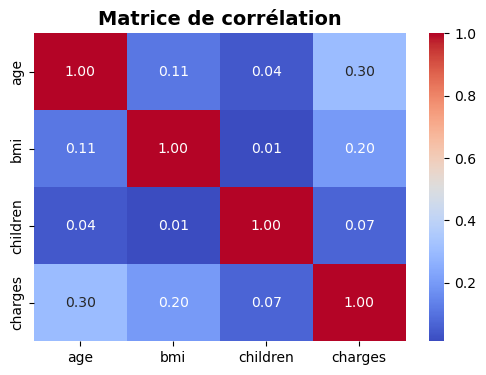

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation", fontsize=14, fontweight="bold")
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_18632\3950126934.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_charges = df.groupby("bmi_category")["charges"].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_18632\3950126934.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bmi_category", y="charges", data=bmi_charges, palette="coolwarm")


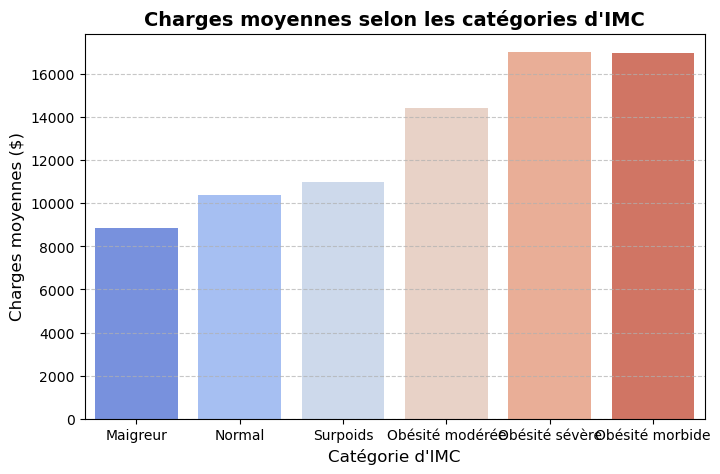

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer des catégories BMI
bins = [0, 18.5, 25, 30, 35, 40, df["bmi"].max()]
labels = ["Maigreur", "Normal", "Surpoids", "Obésité modérée", "Obésité sévère", "Obésité morbide"]
df["bmi_category"] = pd.cut(df["bmi"], bins=bins, labels=labels, right=False)

# Calculer la moyenne des charges par catégorie
bmi_charges = df.groupby("bmi_category")["charges"].mean().reset_index()

# Créer le barplot
plt.figure(figsize=(8,5))
sns.barplot(x="bmi_category", y="charges", data=bmi_charges, palette="coolwarm")
plt.title("Charges moyennes selon les catégories d'IMC", fontsize=14, fontweight="bold")
plt.xlabel("Catégorie d'IMC", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [150]:
!pip install seaborn

C:\Users\user\AppData\Local\Temp\ipykernel_18632\877363943.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_charges = df.groupby("bmi_category")["charges"].mean().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_18632\877363943.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="bmi_category", y="charges", data=bmi_charges, palette="coolwarm")


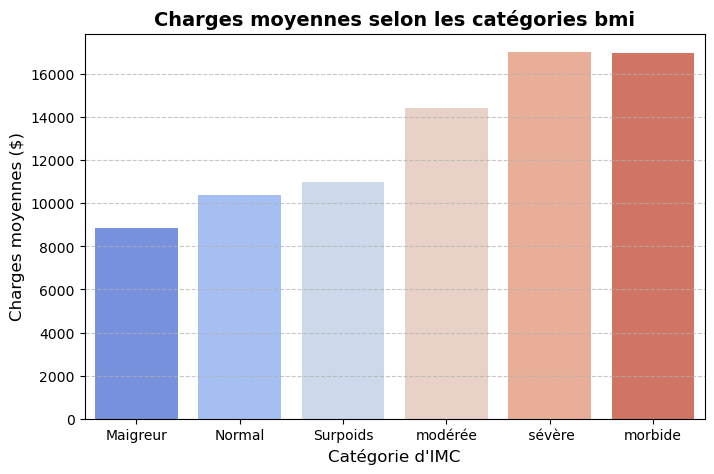

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Créer des catégories BMI
bins = [0, 18.5, 25, 30, 35, 40, df["bmi"].max()]
labels = ["Maigreur", "Normal", "Surpoids", "modérée", " sévère", "morbide"]
df["bmi_category"] = pd.cut(df["bmi"], bins=bins, labels=labels, right=False)

# Calculer la moyenne des charges par catégorie
bmi_charges = df.groupby("bmi_category")["charges"].mean().reset_index()

# Créer le barplot
plt.figure(figsize=(8,5))
sns.barplot(x="bmi_category", y="charges", data=bmi_charges, palette="coolwarm")
plt.title("Charges moyennes selon les catégories bmi", fontsize=14, fontweight="bold")
plt.xlabel("Catégorie d'IMC", fontsize=12)
plt.ylabel("Charges moyennes ($)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [152]:
charges_fumeurs     = df[df["smoker"] == "yes"]["charges"]
charges_nonfumeurs  = df[df["smoker"] == "no"]["charges"]

charges_fumeurs.mean(), charges_nonfumeurs.mean()


(np.float64(32050.23183153284), np.float64(8434.268297856204))

In [153]:
from scipy import stats


In [154]:
t_stat, p_val = stats.ttest_ind(charges_fumeurs,
                                charges_nonfumeurs,
                                equal_var=False)

print("t-stat =", t_stat)
print("p-value =", p_val)


t-stat = 32.751887766341824
p-value = 5.88946444671698e-103


In [160]:
charges_hommes = df[df["sex"] == "male"]["charges"]
charges_femmes = df[df["sex"] == "female"]["charges"]

charges_hommes.mean(), charges_femmes.mean()


(np.float64(13956.751177721893), np.float64(12569.578843835347))

In [162]:
t_stat, p_val = stats.ttest_ind(charges_hommes,
                                charges_femmes,
                                equal_var=False)

print("t-stat =", t_stat)
print("p-value =", p_val)


t-stat = 2.1008878232359565
p-value = 0.03584101495601664


In [164]:
df["age_group"].value_counts()


age_group
18-29    417
50-64    385
40-49    279
30-39    257
Name: count, dtype: int64

In [166]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group', 'bmi_category'],
      dtype='object')

In [168]:
"age_group" in df.columns


True

In [170]:
# Recréer les groupes d'âge EXACTEMENT comme dans ton projet

bins = [18, 30, 40, 50, 65]
labels = ["18-29", "30-39", "40-49", "50-64"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

df["age_group"].value_counts()


age_group
18-29    417
50-64    385
40-49    279
30-39    257
Name: count, dtype: int64

In [172]:
charges_18_29 = df[df["age_group"] == "18-29"]["charges"]
charges_30_39 = df[df["age_group"] == "30-39"]["charges"]
charges_40_49 = df[df["age_group"] == "40-49"]["charges"]
charges_50_64 = df[df["age_group"] == "50-64"]["charges"]


In [174]:
from scipy import stats

f_stat, p_val = stats.f_oneway(charges_18_29,
                               charges_30_39,
                               charges_40_49,
                               charges_50_64)

print("F-stat =", f_stat)
print("p-value =", p_val)


F-stat = 40.01501546958908
p-value = 9.251634882483711e-25


In [176]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

# Préparer les données pour Tukey
charges = df["charges"]
groupes = df["age_group"]

# Test de Tukey
tukey = pairwise_tukeyhsd(endog=charges,
                          groups=groupes,
                          alpha=0.05)

print(tukey)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower     upper    reject
----------------------------------------------------------
 18-29  30-39  2556.297 0.0285  187.4683  4925.1256   True
 18-29  40-49 5216.7164    0.0  2906.393  7527.0398   True
 18-29  50-64 8720.0649    0.0 6608.8761 10831.2538   True
 30-39  40-49 2660.4194 0.0406   77.8499   5242.989   True
 30-39  50-64  6163.768    0.0 3757.6945  8569.8414   True
 40-49  50-64 3503.3485 0.0008 1154.8523  5851.8447   True
----------------------------------------------------------


In [177]:
!pip install statsmodels


In [178]:
# Séparer les charges selon le sexe
charges_hommes = df[df["sex"] == "male"]["charges"]
charges_femmes = df[df["sex"] == "female"]["charges"]

# Vérifier les tailles des groupes (optionnel mais utile)
len(charges_hommes), len(charges_femmes)


(676, 662)

In [180]:
charges_hommes.mean(), charges_femmes.mean()


(np.float64(13956.751177721893), np.float64(12569.578843835347))

In [181]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(charges_hommes,
                                charges_femmes,
                                equal_var=False)

print("t-stat =", t_stat)
print("p-value =", p_val)


t-stat = 2.1008878232359565
p-value = 0.03584101495601664


In [182]:
# Recréer les catégories BMI (EXACTEMENT comme ton projet)
bins_bmi = [0, 18.5, 25, 30, 35, 40, df["bmi"].max()]
labels_bmi = ["Maigreur", "Normal", "Surpoids", "Obésité modérée", "Obésité sévère", "Obésité morbide"]

df["bmi_group"] = pd.cut(df["bmi"], bins=bins_bmi, labels=labels_bmi, right=False)


In [183]:
charges_maigreur        = df[df["bmi_group"] == "Maigreur"]["charges"]
charges_normal          = df[df["bmi_group"] == "Normal"]["charges"]
charges_surpoids        = df[df["bmi_group"] == "Surpoids"]["charges"]
charges_ob_moderee      = df[df["bmi_group"] == "Obésité modérée"]["charges"]
charges_ob_severe       = df[df["bmi_group"] == "Obésité sévère"]["charges"]
charges_ob_morbide      = df[df["bmi_group"] == "Obésité morbide"]["charges"]


In [184]:
df["bmi_group"].value_counts()


bmi_group
Obésité modérée    391
Surpoids           386
Obésité sévère     225
Normal             225
Obésité morbide     90
Maigreur            20
Name: count, dtype: int64

In [185]:
from scipy import stats

f_stat_bmi, p_val_bmi = stats.f_oneway(
    charges_maigreur,
    charges_normal,
    charges_surpoids,
    charges_ob_moderee,
    charges_ob_severe,
    charges_ob_morbide
)

print("F-stat =", f_stat_bmi)
print("p-value =", p_val_bmi)


F-stat = 13.042860955428988
p-value = 2.0467751414449095e-12


In [186]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_group', 'bmi_group', 'bmi_category'],
      dtype='object')

In [187]:
df_reg = df [['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]
#df_reg = df [['age', 'bmi', 'children', 'smoker', 'charges']]
df_reg.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [188]:
df_reg = pd.get_dummies(df_reg , columns=["sex","smoker"],drop_first=True)
#df_reg = pd.get_dummies(df_reg , columns=["smoker"],drop_first=True)

df_reg

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [200]:
df_reg.dtypes

age             int64
bmi           float64
children        int64
charges       float64
sex_male         bool
smoker_yes       bool
dtype: object

In [202]:

import statsmodels.api as sm
 

df_reg = df [['age', 'sex', 'bmi', 'children', 'smoker', 'charges']]
df_reg = pd.get_dummies(df_reg , columns=["sex","smoker"],drop_first=True)
y = df_reg["charges"]
X = df_reg.drop("charges", axis=1)
 
X = X.astype({col: "int" for col in X.select_dtypes(include="bool").columns})
#conversion pour pouvoir faire la regression linéaire simple
X = X.replace({True: 1, False: 0})

X = sm.add_constant(X)
# Régression linéaire OLS 

model = sm.OLS(y, X).fit()
#Résumé complet 
print(model.summary())

 

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Wed, 03 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:30:56   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.0

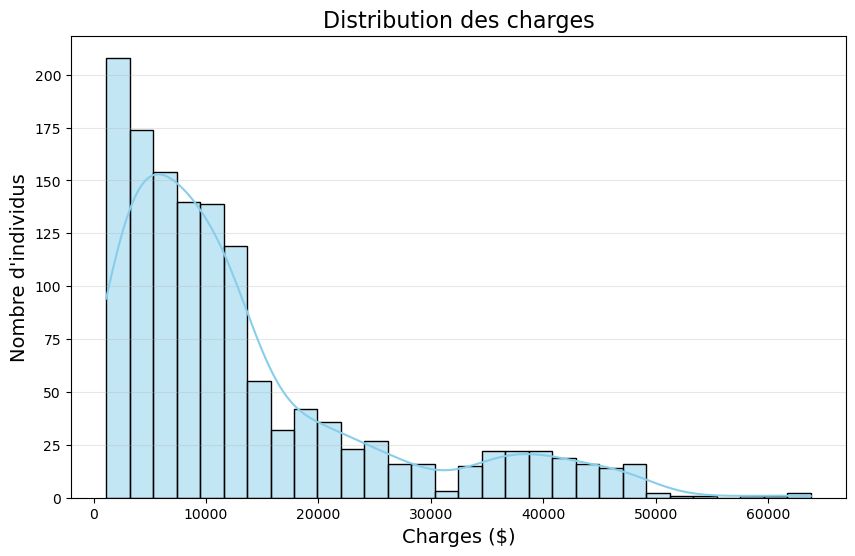

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["charges"], bins=30, kde=True, color="skyblue")

plt.title("Distribution des charges", fontsize=16)
plt.xlabel("Charges ($)", fontsize=14)
plt.ylabel("Nombre d'individus", fontsize=14)

plt.grid(axis="y", alpha=0.3)
plt.show()
